In [1]:
import tensorflow as tf

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
os.chdir(r'C:\Users\sayus\Desktop\Deep Learning\Neural Network\Crop Disease\dataset')
directory = os.getcwd()
directory

'C:\\Users\\sayus\\Desktop\\Deep Learning\\Neural Network\\Crop Disease\\dataset'

In [5]:
train_data = os.path.join('train/')
val_data = os.path.join('val/')
file = os.listdir(train_data)
print(file[:])

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

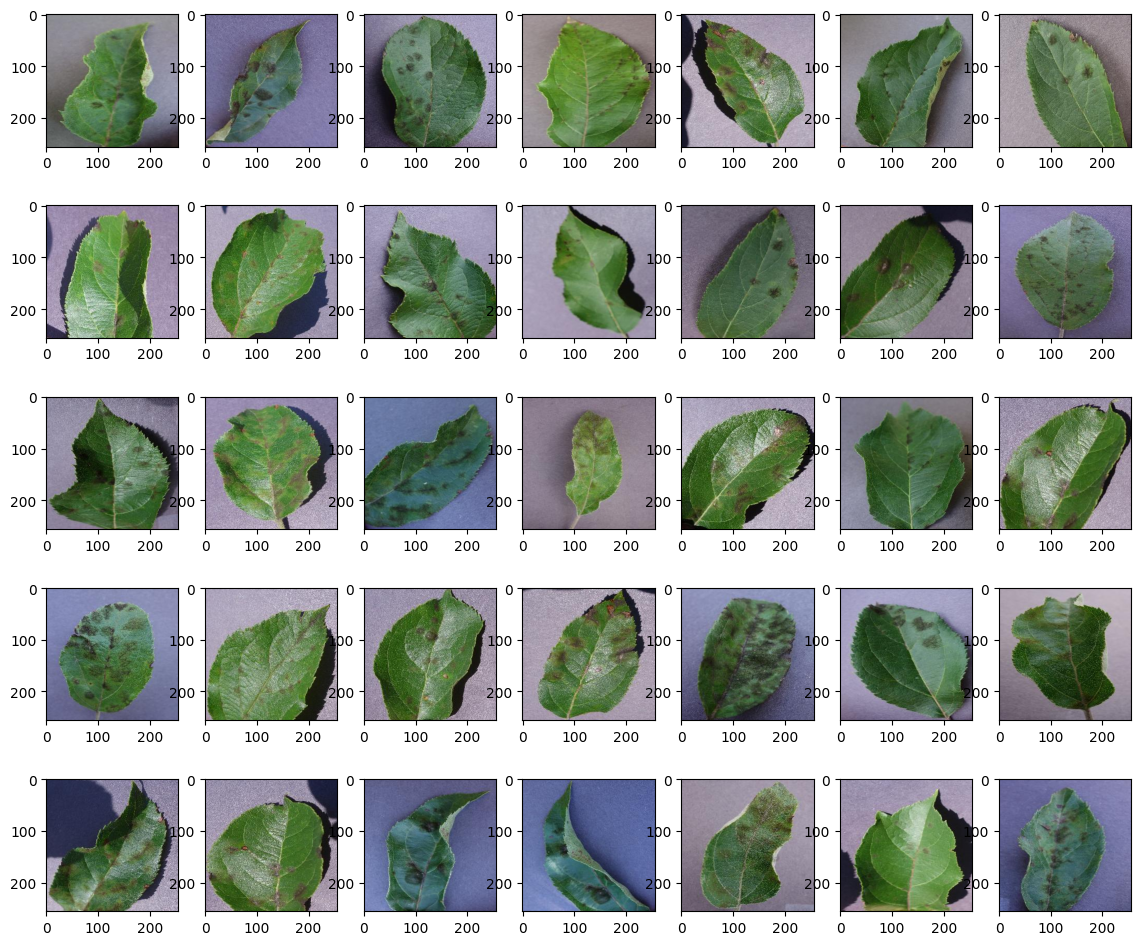

In [23]:
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the list of folders in the 'val' directory
folder_path = 'C:/Users/sayus/Desktop/Deep Learning/Neural Network/Crop Disease/dataset/val/'
folders = os.listdir(folder_path)

# Initialize subplot counter
cn = 1
plt.figure(figsize=(14,12))

# Set a maximum limit of 35 images
max_images = 35

# Loop through each folder and the images inside
for folder in folders:
    image_path = folder_path + folder + '/'
    images = os.listdir(image_path)
    
    # Loop through each image in the folder
    for img_file in images:
        if cn > max_images:  # Stop if the limit is reached
            break
        img = mpimg.imread(image_path + img_file)
        
        # Display image in a subplot
        plt.subplot(5, 7, cn)
        plt.imshow(img)
        plt.axis('on')  # Optional: Hide axes for better visualization
        cn += 1
    
    if cn > max_images:
        break

plt.show()




In [6]:

# Load the InceptionV3 model pre-trained on ImageNet
base_model = tf.keras.applications.InceptionV3(
    include_top=False,  # Exclude the top fully connected layer
    weights="imagenet",
    input_shape=(299, 299, 3)
)

# Extracting the input and output tensors from the base model
input_tensor = base_model.input
output_tensor = base_model.layers[-1].output  # Last convolutional layer's output

# Adding custom layers on top of the base model
x = tf.keras.layers.GlobalAveragePooling2D()(output_tensor)  # Global pooling to reduce dimensionality
x = tf.keras.layers.Dense(128, activation='relu')(x)  # Fully connected layer with 128 units and ReLU activation
x = tf.keras.layers.Dropout(0.2)(x)  # Dropout for regularization
output_tensor = tf.keras.layers.Dense(38, activation='softmax')(x)  # Final classification layer with 38 classes

# Create the final model
model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

# Print the model summary to check the architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [7]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer= 'Adam',
             metrics=['accuracy'])

In [8]:
train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

val_gen = ImageDataGenerator(rescale = 1/255)
val_data_gen = val_gen.flow_from_directory(val_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 43429 images belonging to 38 classes.
Found 10876 images belonging to 38 classes.


In [9]:
categories = train_data_gen.class_indices.keys()
key_list = list(train_data_gen.class_indices.keys())
val_list = list(train_data_gen.class_indices.values())
print(key_list)
print(val_list)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [10]:
model_fitting = model.fit(
    train_data_gen,
    steps_per_epoch=1000,
    epochs=80,
    validation_data=val_data_gen,
    validation_steps=100,  # Number of batches to validate each epoch
    verbose=2
)

Epoch 1/80
1000/1000 - 316s - loss: 2.3770 - accuracy: 0.3630 - val_loss: 2.1571 - val_accuracy: 0.4420 - 316s/epoch - 316ms/step
Epoch 2/80
1000/1000 - 317s - loss: 1.6669 - accuracy: 0.5180 - val_loss: 1.6929 - val_accuracy: 0.5580 - 317s/epoch - 317ms/step
Epoch 3/80
1000/1000 - 300s - loss: 1.3479 - accuracy: 0.5941 - val_loss: 0.8227 - val_accuracy: 0.7430 - 300s/epoch - 300ms/step
Epoch 4/80
1000/1000 - 305s - loss: 1.1250 - accuracy: 0.6623 - val_loss: 0.8262 - val_accuracy: 0.7430 - 305s/epoch - 305ms/step
Epoch 5/80
1000/1000 - 300s - loss: 0.9103 - accuracy: 0.7182 - val_loss: 1.5996 - val_accuracy: 0.6150 - 300s/epoch - 300ms/step
Epoch 6/80
1000/1000 - 300s - loss: 0.7916 - accuracy: 0.7528 - val_loss: 1.1514 - val_accuracy: 0.6950 - 300s/epoch - 300ms/step
Epoch 7/80
1000/1000 - 299s - loss: 0.7146 - accuracy: 0.7752 - val_loss: 0.3460 - val_accuracy: 0.8960 - 299s/epoch - 299ms/step
Epoch 8/80
1000/1000 - 299s - loss: 0.6381 - accuracy: 0.8007 - val_loss: 0.6854 - val_acc

In [11]:
acc = model_fitting.history["accuracy"]
validation_acc = model_fitting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.3630000054836273, 0.5180000066757202, 0.5940999984741211, 0.6622662544250488, 0.7181718349456787, 0.7527999877929688, 0.7752000093460083, 0.8007000088691711, 0.8148999810218811, 0.8259000182151794, 0.8435999751091003, 0.8432000279426575, 0.8604999780654907, 0.85798579454422, 0.875, 0.8823999762535095, 0.8895999789237976, 0.8901000022888184, 0.8970999717712402, 0.9002900123596191, 0.8920999765396118, 0.9051905274391174, 0.9107910990715027, 0.9071999788284302, 0.9190999865531921, 0.9140999913215637, 0.9168999791145325, 0.9259926080703735, 0.9229999780654907, 0.9304999709129333, 0.9272927045822144, 0.9315931797027588, 0.932200014591217, 0.934693455696106, 0.9391999840736389, 0.9361000061035156, 0.9350000023841858, 0.9480999708175659, 0.9437999725341797, 0.9430000185966492, 0.9426000118255615, 0.9524999856948853, 0.9455000162124634, 0.9472000002861023, 0.9517999887466431, 0.9473000168800354, 0.949400007724762, 0.9512951374053955, 0.9523000121116638, 0.9563000202178955, 0.956099987030029

In [12]:
loss = model_fitting.history["loss"]
validation_loss = model_fitting.history["val_loss"]
print(loss)
print(validation_loss)

[2.377030611038208, 1.6668587923049927, 1.347922444343567, 1.12498140335083, 0.910262405872345, 0.791553258895874, 0.7145783305168152, 0.638107180595398, 0.5938138365745544, 0.5476975440979004, 0.49864667654037476, 0.4821491241455078, 0.4448899030685425, 0.44355499744415283, 0.40620356798171997, 0.36679717898368835, 0.35213157534599304, 0.3451809287071228, 0.32320982217788696, 0.32540208101272583, 0.3480493724346161, 0.2985610365867615, 0.28238415718078613, 0.29409343004226685, 0.262071430683136, 0.2674712538719177, 0.25850623846054077, 0.24096082150936127, 0.24395965039730072, 0.22221091389656067, 0.22996088862419128, 0.21816964447498322, 0.21227113902568817, 0.22019006311893463, 0.19215403497219086, 0.20319606363773346, 0.2067466527223587, 0.1667839139699936, 0.17531940340995789, 0.18527454137802124, 0.18576979637145996, 0.1528288871049881, 0.17853513360023499, 0.16636796295642853, 0.16278430819511414, 0.16893857717514038, 0.159232497215271, 0.15878857672214508, 0.1547291874885559, 0

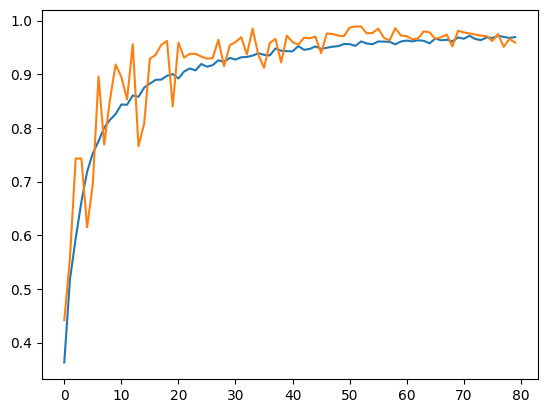

In [13]:
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

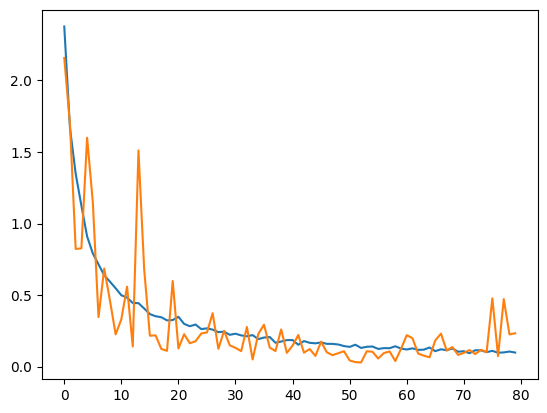

In [14]:
epochs=range(len(loss))
plt.plot(epochs ,loss )
plt.plot(epochs, validation_loss)
plt.show()

In [24]:
eval = model.evaluate(val_data_gen)

1088/1088 [==============================] - 135s 124ms/step - loss: 0.1888 - accuracy: 0.9708


1/1 [==============================] - 0s 33ms/step
Predicted: Apple___Cedar_apple_rust
Original: Apple___Cedar_apple_rust


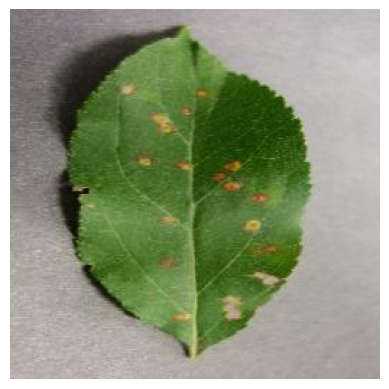

In [28]:
path = "C:/Users/sayus/Desktop/Deep Learning/Neural Network/Crop Disease/dataset/New/AppleCedarRust2.JPG"

# Load the image for display using matplotlib
img = mpimg.imread(path)

# Load the image for prediction using Keras's load_img and img_to_array
image = load_img(path, target_size=(299, 299))  # Ensure target_size matches your model input
x = img_to_array(image)
x = x.reshape(1, 299, 299, 3)  # Reshape to match model's expected input shape
x = x / 255  # Normalize the image

# Predict the class using the pre-trained model
res = model.predict(x)  # Assuming 'model' is already defined and loaded
RES = np.argmax(res[0])

# Assuming key_list maps the predicted index to the class label
value = key_list[RES]

# Display the original image using matplotlib
plt.imshow(img)
plt.axis('off')  # Optionally hide axes for better visualization

# Print the predicted and original labels
print("Predicted: " + value)
print("Original: Apple___Cedar_apple_rust")

plt.show()